In [219]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import linregress
from sklearn import datasets
import pandas as pd

In [220]:
spotify_data = pd.read_csv("Spotify_tracks.csv",encoding='latin-1')

In [221]:
spotify_data.shape

(19252, 18)

In [222]:
spotify_data.dtypes

Unnamed: 0              int64
disc_number             int64
duration_ms.x           int64
href                   object
name                   object
popularity              int64
album.release_date     object
danceability          float64
energy                float64
key                     int64
loudness              float64
mode                    int64
speechiness           float64
acousticness          float64
instrumentalness      float64
liveness              float64
valence               float64
tempo                 float64
dtype: object

In [223]:
#Leave only year
spotify_data['album.release_date'] = spotify_data['album.release_date'].str.split('-').str[0]

In [224]:
spotify_data.head(1)

,Unnamed: 0,disc_number,duration_ms.x,href,name,popularity,album.release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,1,1,188490,https://api.spotify.com/v1/tracks/000xQL6tZNLJ...,Still Got Time,63,2017,0.748,0.627,7,-6.029,1,0.0644,0.131,0.0,0.0852,0.524,120.963


In [225]:
#drop unnecessary columns
spotify_data = spotify_data.drop(columns=['Unnamed: 0', 'disc_number','href','name'])

In [226]:
#rename columns
spotify_data= spotify_data.rename(columns={"duration_ms.x": "duration", "album.release_date": "album release date"})

In [227]:
spotify_data.head(1)

,duration,popularity,album release date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,188490,63,2017,0.748,0.627,7,-6.029,1,0.0644,0.131,0.0,0.0852,0.524,120.963


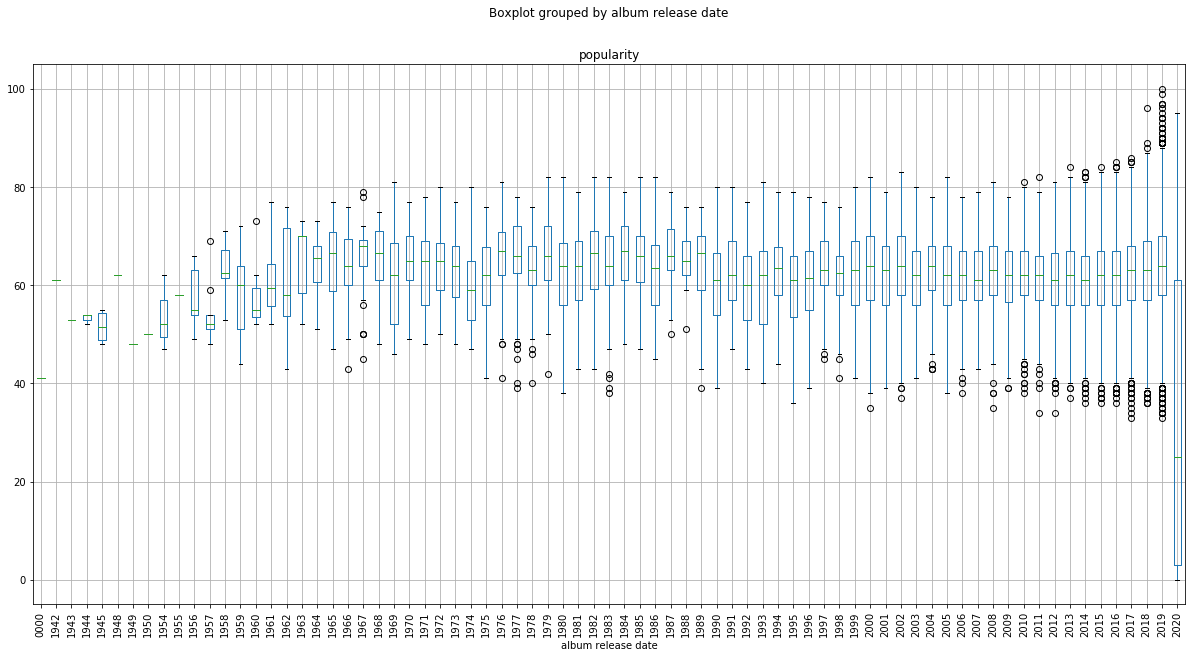

In [228]:
#Visualize distributions of datapoints per year for popularity
spotify_data.boxplot("popularity", by='album release date', figsize=(20, 10), rot=90)

The distributions in popularity for years below 1963 seem to not follow a specific pattern on their mean. Also there seems to be very few data available on those years.

Year 0000 makes no sense.

Very few outliars overall are shown, dont think they would add much unnecessary noise (However this may be wrong). This outliars may not even be noise and characterize different popularities, so it should be kept for now.

Would suggest to take from 1963 and forward due to similar distributions and data availability.

On closer inspection, 2020 follows a completely different distribution too, making it possibly another problem on itself

In [229]:
sp_df_popularity_count = pd.DataFrame(spotify_data.groupby('album release date')['popularity'].count())
sp_df_popularity_count.tail(30)

,popularity
album release date,
1991,72
1992,85
1993,75
1994,94
1995,87
1996,100
1997,91
1998,84
1999,125


Upon closer inspection on data count(data availability for popularity) I would suggest to use years above 2010 to train the model, and limit our experiment to this years.

In [230]:
spotify_data = spotify_data.astype({"album release date": int})

In [231]:
#Choose years to delimit * to discuss with team*. Would suggest to do it max for 1/2 years
spotify_data_filter = spotify_data[(2018 <= spotify_data['album release date'])]

In [234]:
spotify_data_filter['popularity'].unique()

array([ 67,  73,  61,  50,   2,  47,  68,  69,  51,  57,  72,  78,  62,
        20,  59,  60,  74,  35,  53,  44,  71,   0,  56,  65,  75,  55,
         1,  52,  66,  46,  19,  54,  64,  30,  39,  49,  43,  76,  63,
        10,   4,  81,  48,  12,  70,  14,  17,  15,  34,  58,  11,  90,
        21,  85,  79,   8,  13,   7,   3,  82,  83,  24,  38,  86,   6,
        41,  77,  84,  87,  18,  88,  27,  23,  22,  42,  45,  80,  37,
        40,  16,  25,  99,   5,   9, 100,  89,  26,  36,  28,  92,  33,
        29,  95,  94,  93,  32,  91,  97,  96,  31])

In [233]:
spotify_data_filter['album release date'].unique()

array([2019, 2020, 2018])

In [236]:
spotify_data_filter.loc[spotify_data_filter['popularity']< 20, 'Rating'] = 1
spotify_data_filter.loc[(spotify_data_filter['popularity']>= 20) & (spotify_data_filter['popularity']< 40), 'Rating'] = 2
spotify_data_filter.loc[(spotify_data_filter['popularity']>= 40) & (spotify_data_filter['popularity']< 60), 'Rating'] = 3
spotify_data_filter.loc[(spotify_data_filter['popularity']>= 60) & (spotify_data_filter['popularity']< 80), 'Rating'] = 4
spotify_data_filter.loc[(spotify_data_filter['popularity']>= 80) & (spotify_data_filter['popularity']<= 100), 'Rating'] = 5

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [237]:
spotify_data_filter

,duration,popularity,album release date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Rating
1,191053,67,2019,0.573,0.846,7,-4.866,1,0.0344,0.00372,0.000079,0.2900,0.562,127.061,4.0
3,236778,73,2020,0.842,0.578,6,-6.050,0,0.1380,0.00419,0.000000,0.2280,0.190,74.496,4.0
5,170626,61,2018,0.684,0.564,10,-6.852,1,0.0297,0.42500,0.000000,0.1520,0.368,134.958,4.0
6,248841,50,2019,0.675,0.915,8,-6.699,0,0.0416,0.03290,0.210000,0.2730,0.117,117.999,3.0
7,263441,2,2020,0.387,0.326,7,-9.042,0,0.0381,0.98100,0.953000,0.1940,0.283,84.384,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19245,226005,63,2019,0.689,0.463,2,-8.121,0,0.0365,0.06600,0.000152,0.1450,0.864,86.998,4.0
19246,186800,48,2018,0.703,0.676,2,-3.321,1,0.0303,0.34400,0.000000,0.2630,0.853,125.936,3.0
19248,233600,1,2020,0.448,0.492,0,-7.957,1,0.0315,0.16400,0.000000,0.0987,0.363,168.968,1.0
19249,307800,0,2020,0.684,0.799,9,-9.783,0,0.0376,0.11500,0.000276,0.1680,0.837,117.853,1.0


In [203]:
#Sample a part of the data for clarity in the scatter plots
#spotify_sample = spotify_data_filter.sample(n=500)
spotify_sample = spotify_data_filter

The r-squared is: 0.49887573849330025


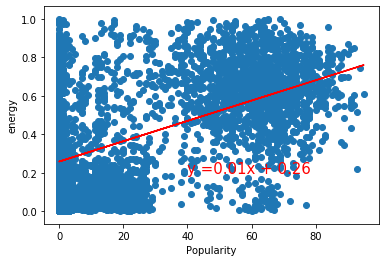

In [204]:
# Energy
x_values = spotify_sample['popularity']
y_values = spotify_sample['energy']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,.2),fontsize=15,color="red")
plt.xlabel('Popularity')
plt.ylabel('energy')
print(f"The r-squared is: {rvalue}")
plt.show()
#r-value tells us how correlated it is

The r-squared is: 0.5612014111697926


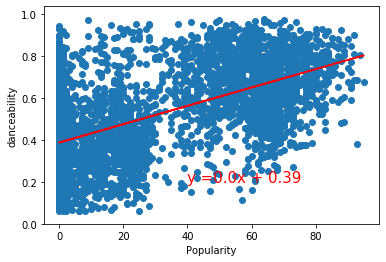

In [205]:
# Danceability
x_values = spotify_sample['popularity']
y_values = spotify_sample['danceability']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,.2),fontsize=15,color="red")
plt.xlabel('Popularity')
plt.ylabel('danceability')
print(f"The r-squared is: {rvalue}")
plt.show()
#r-value tells us how correlated it is

The r-squared is: 0.0070322869271315334


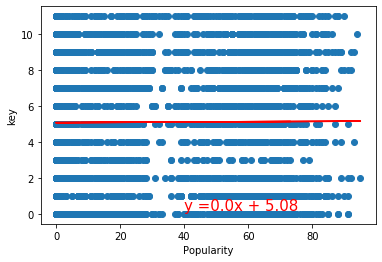

In [206]:
#key
x_values = spotify_sample['popularity']
y_values = spotify_sample['key']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,.2),fontsize=15,color="red")
plt.xlabel('Popularity')
plt.ylabel('key')
print(f"The r-squared is: {rvalue}")
plt.show()
#r-value tells us how correlated it is

The r-squared is: 0.5846437636757474


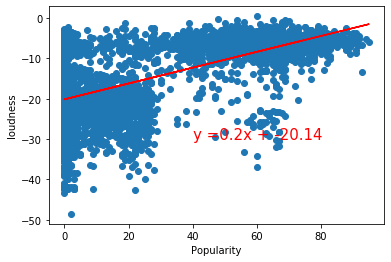

In [207]:
# loudness
x_values = spotify_sample['popularity']
y_values = spotify_sample['loudness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,-30),fontsize=15,color="red")
plt.xlabel('Popularity')
plt.ylabel('loudness')
print(f"The r-squared is: {rvalue}")
plt.show()
#r-value tells us how correlated it is

The r-squared is: -0.08389754124687474


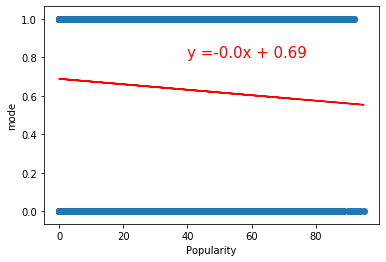

In [208]:
# mode , Idk what mode means
x_values = spotify_sample['popularity']
y_values = spotify_sample['mode']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,.8),fontsize=15,color="red")
plt.xlabel('Popularity')
plt.ylabel('mode')
print(f"The r-squared is: {rvalue}")
plt.show()
#r-value tells us how correlated it is

The r-squared is: 0.380815080325169


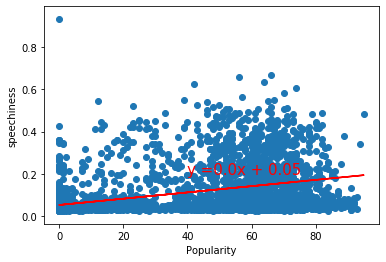

In [209]:
#speechiness
x_values = spotify_sample['popularity']
y_values = spotify_sample['speechiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,.2),fontsize=15,color="red")
plt.xlabel('Popularity')
plt.ylabel('speechiness')
print(f"The r-squared is: {rvalue}")
plt.show()
#r-value tells us how correlated it is

The r-squared is: -0.5751204207121857


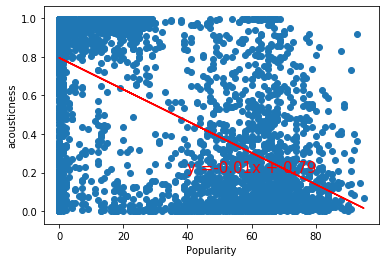

In [210]:
#acousticness
x_values = spotify_sample['popularity']
y_values = spotify_sample['acousticness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,.2),fontsize=15,color="red")
plt.xlabel('Popularity')
plt.ylabel('acousticness')
print(f"The r-squared is: {rvalue}")
plt.show()
#r-value tells us how correlated it is

The r-squared is: -0.5328668664270635


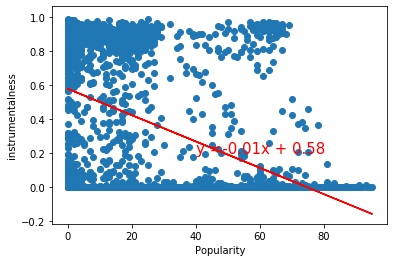

In [211]:
#instrumentalness
x_values = spotify_sample['popularity']
y_values = spotify_sample['instrumentalness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,.2),fontsize=15,color="red")
plt.xlabel('Popularity')
plt.ylabel('instrumentalness')
print(f"The r-squared is: {rvalue}")
plt.show()
#r-value tells us how correlated it is

The r-squared is: 0.11293959460158699


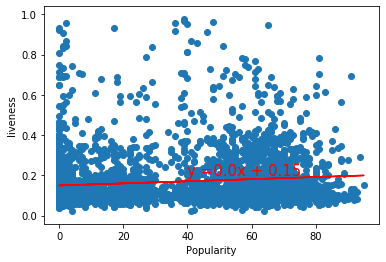

In [212]:
#liveness
x_values = spotify_sample['popularity']
y_values = spotify_sample['liveness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,.2),fontsize=15,color="red")
plt.xlabel('Popularity')
plt.ylabel('liveness')
print(f"The r-squared is: {rvalue}")
plt.show()
#r-value tells us how correlated it is

The r-squared is: 0.1404770609072643


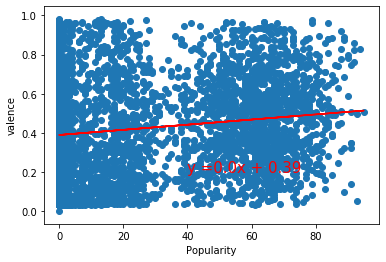

In [213]:
#valence
x_values = spotify_sample['popularity']
y_values = spotify_sample['valence']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,.2),fontsize=15,color="red")
plt.xlabel('Popularity')
plt.ylabel('valence')
print(f"The r-squared is: {rvalue}")
plt.show()
#r-value tells us how correlated it is

The r-squared is: -0.338874631427609


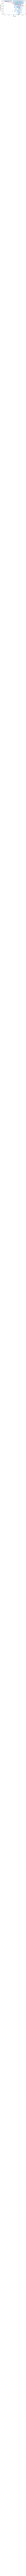

In [129]:
#year
x_values = spotify_sample['popularity']
y_values = spotify_sample['album release date']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,.2),fontsize=15,color="red")
plt.xlabel('Popularity')
plt.ylabel('album release date')
print(f"The r-squared is: {rvalue}")
plt.show()
#r-value tells us how correlated it is

The r-squared is: 0.20126231840708544


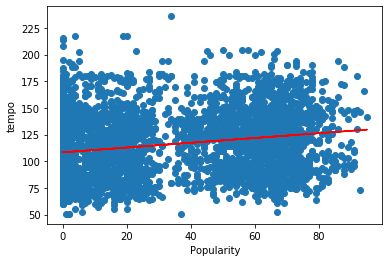

In [214]:
#tempo
x_values = spotify_sample['popularity']
y_values = spotify_sample['tempo']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,.2),fontsize=15,color="red")
plt.xlabel('Popularity')
plt.ylabel('tempo')
print(f"The r-squared is: {rvalue}")
plt.show()
#r-value tells us how correlated it is

In [215]:
df1 = spotify_sample.pop('popularity')
spotify_sample['popularity']= df1
spotify_sample

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,duration,album release date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity
3,236778,2020,0.842,0.57800,6,-6.050,0,0.1380,0.00419,0.000000,0.2280,0.1900,74.496,73
7,263441,2020,0.387,0.32600,7,-9.042,0,0.0381,0.98100,0.953000,0.1940,0.2830,84.384,2
10,174333,2020,0.384,0.59800,10,-8.216,0,0.1530,0.16800,0.000000,0.6100,0.3650,82.455,69
13,188560,2020,0.616,0.71100,10,-3.369,1,0.0386,0.37600,0.000000,0.1480,0.3780,140.046,57
23,113996,2020,0.833,0.39000,0,-8.339,1,0.4140,0.13000,0.000007,0.1100,0.3530,159.996,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,232240,2020,0.865,0.74900,2,-7.131,1,0.0640,0.05570,0.002260,0.0661,0.4010,102.016,0
19236,572800,2020,0.302,0.14800,5,-22.620,0,0.0346,0.98500,0.909000,0.0829,0.0639,94.841,14
19242,237861,2020,0.324,0.00249,0,-34.247,1,0.0351,0.99400,0.946000,0.1100,0.0362,67.725,60
19248,233600,2020,0.448,0.49200,0,-7.957,1,0.0315,0.16400,0.000000,0.0987,0.3630,168.968,1


/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.10319662 0.         0.10274161 0.10065232 0.07882152 0.10651009
 0.0230382  0.09812888 0.10501019 0.08188888 0.0947347  0.105277  ]


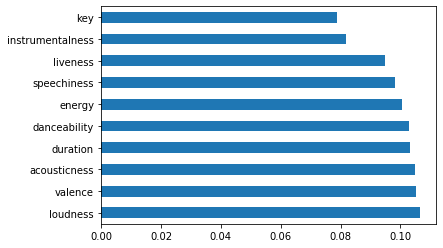

In [216]:
#feature importance

from sklearn.ensemble import ExtraTreesClassifier

X = spotify_sample.iloc[:,0:12]  #independent columns
y = spotify_sample.iloc[:,-1]    #target column 


model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


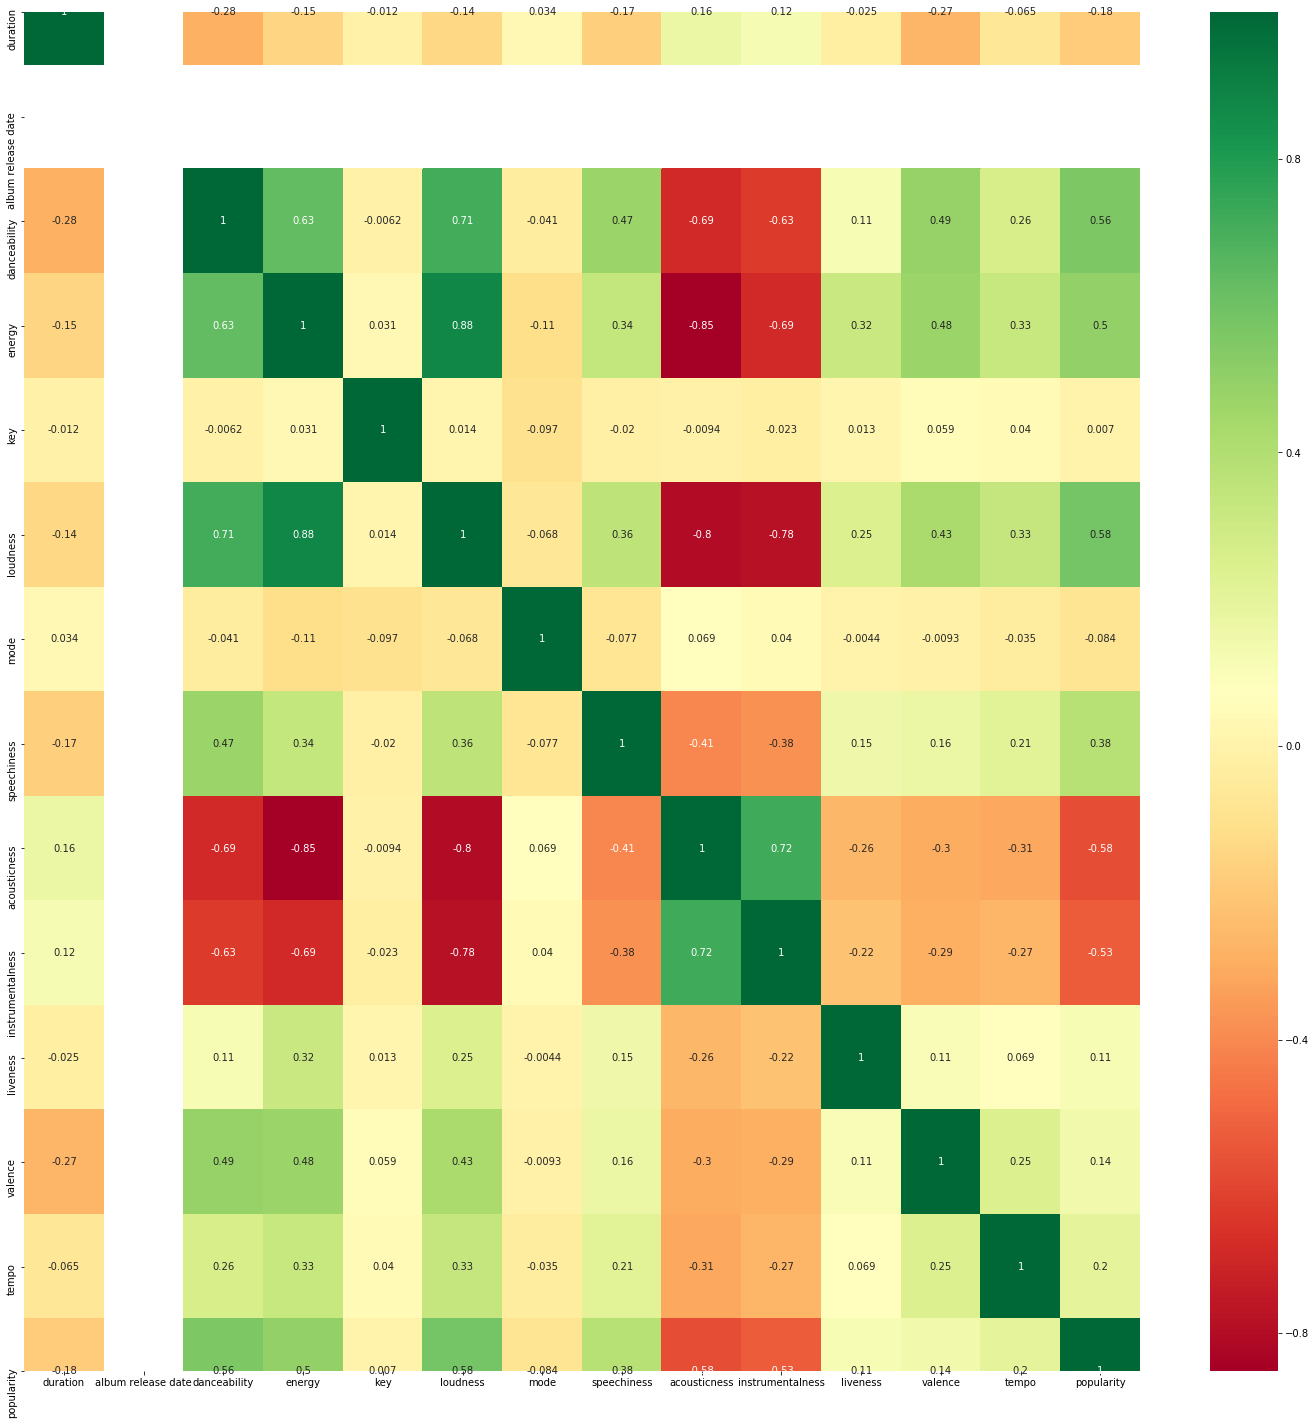

In [217]:
import seaborn as sns

X = spotify_sample.iloc[:,0:12]  #independent columns
y = spotify_sample.iloc[:,-1]    #target column 

#get correlations of each features in dataset
corrmat = spotify_sample.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(25,25))
#plot heat map
g=sns.heatmap(spotify_sample[top_corr_features].corr(),annot=True,cmap="RdYlGn")